# ML Reglas de Precio OBSOLETO

Objetivo: Identificar factores importantes para clasificación de reglas de precio e incremento de CPM.

Variables disponibles cualitativas: 
    - Sitio (DFP Ad Unit)
    - Dispositivo (Device category)
    - Tipo de transacción (Transaction Type)
    - Tamaño de creativo (Creative Size)

Variables disponibles cuantitativas:
    - Ad Requests.
    - Matched Requests.
    - Clicks.
    - Estimated Revenue
    - Ad Impressions
    - Active View Enabled Impressions
    - Active View measured Impressions
    

In [136]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [137]:
import os
import tarfile
import urllib.request
import pandas as pd

HOUSING_PATH = os.path.join("datasets")

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "arc_reglas_precio2.csv")
    return pd.read_csv(csv_path)

# Carga y primera visualización de datos

In [138]:
housing = load_housing_data()
housing.head()

,Mes,DFP Ad Units (Top Level),Transaction types,Creative sizes,Ad requests,Matched requests,Clicks,Estimated revenue (MX$),Ad impressions,Active view measurable,Active view viewable,Active view enabled impressions,Active view measured impressions
0,01-ene,19916383 » AMP_Excelsior_300x250,Open auction,300x250,2867102,2867102,17964,16972.931960,2361040,6.976313,4.007026,2355747,2351475
1,01-ene,19916383 » AMP_Excelsior_300x250,Open auction,330x250,1331456,1331456,18473,7008.696108,1114133,0.998709,0.559807,1111388,1109953
2,01-ene,19916383 » AMP_Excelsior_300x250,Open auction,360x250,39130,39130,186,120.768099,32950,0.999970,0.496250,32936,32935
3,01-ene,35139216 » Actitud Fem 2.0,First look,300x100,5,5,0,0.262184,4,1.000000,1.000000,4,4
4,01-ene,35139216 » Actitud Fem 2.0,First look,300x250,2941,2941,23,69.172601,1703,22.779634,12.540094,1703,1694


In [139]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2267 entries, 0 to 2266
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Mes                               2267 non-null   object 
 1   DFP Ad Units (Top Level)          2267 non-null   object 
 2   Transaction types                 2267 non-null   object 
 3   Creative sizes                    2267 non-null   object 
 4   Ad requests                       2267 non-null   int64  
 5   Matched requests                  2267 non-null   int64  
 6   Clicks                            2267 non-null   int64  
 7   Estimated revenue (MX$)           2267 non-null   float64
 8   Ad impressions                    2267 non-null   int64  
 9   Active view measurable            2267 non-null   float64
 10  Active view viewable              2267 non-null   float64
 11  Active view enabled impressions   2267 non-null   int64  
 12  Active

In [140]:
housing.describe()

,Ad requests,Matched requests,Clicks,Estimated revenue (MX$),Ad impressions,Active view measurable,Active view viewable,Active view enabled impressions,Active view measured impressions
count,2.267000e+03,2.267000e+03,2267.000000,2267.000000,2.267000e+03,2267.000000,2267.000000,2.267000e+03,2.267000e+03
mean,1.921665e+05,1.921665e+05,646.608734,1115.268047,1.431779e+05,26.304232,14.829774,1.426626e+05,1.421016e+05
std,5.973365e+05,5.973365e+05,3407.266694,3325.862886,4.423279e+05,38.355395,21.364431,4.408633e+05,4.392831e+05
min,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2.975000e+02,2.975000e+02,1.000000,2.685017,1.725000e+02,3.998596,2.000000,1.725000e+02,1.690000e+02
50%,8.387000e+03,8.387000e+03,28.000000,90.691862,6.121000e+03,12.833590,7.283125,5.965000e+03,5.942000e+03
75%,8.977800e+04,8.977800e+04,212.000000,692.095852,6.422350e+04,33.463735,19.657310,6.397450e+04,6.380600e+04
max,7.480844e+06,7.480844e+06,71230.000000,38487.412620,4.606726e+06,486.585256,229.370291,4.606723e+06,4.576381e+06


Saving figure attribute_histogram_plots


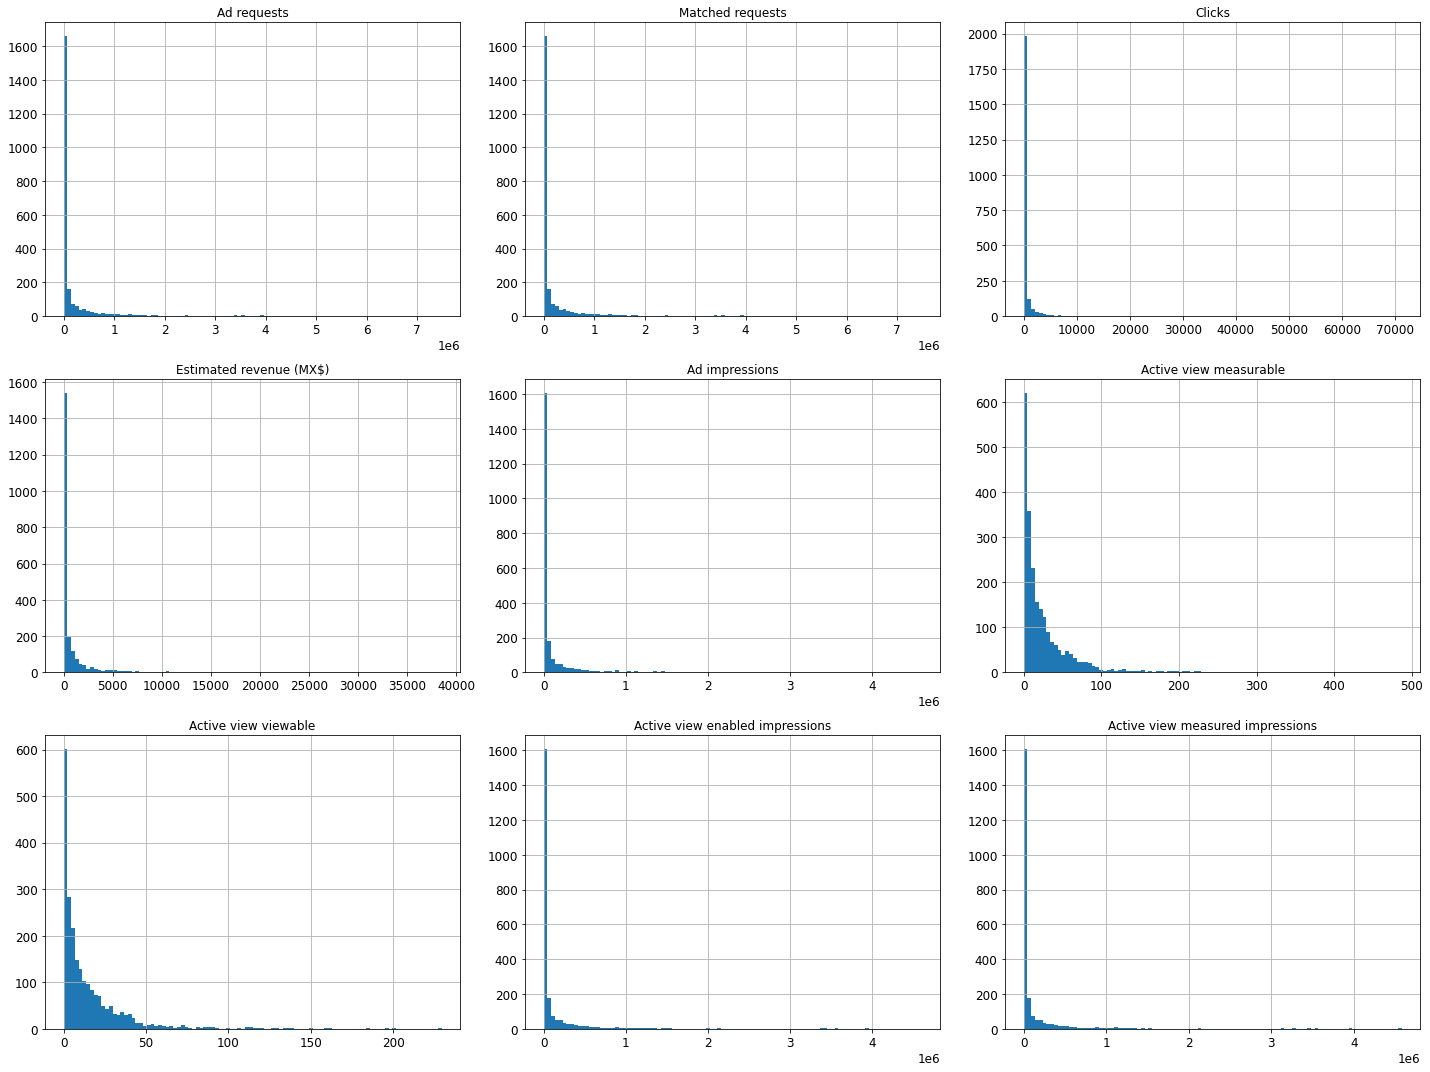

In [141]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=100, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

# Generación de set de entramiento 80% y validación 20%

In [142]:
# Creación de Métrica rCPM Ingresos/Ad Requests * 1,000
housing['rCPM'] = housing['Estimated revenue (MX$)']/housing['Ad requests']*1000

<AxesSubplot:>

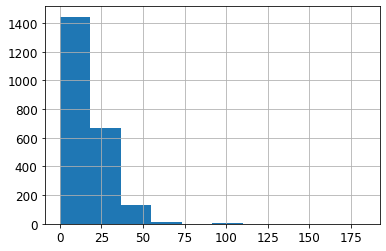

In [143]:
housing["rCPM"].hist()

In [144]:
housing['rCPM_cat'] = pd.cut(housing["rCPM"],
                               bins=[-np.inf, 6., 12., 18., 24., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [145]:
housing["rCPM_cat"].value_counts()

1    1013
5     604
2     285
4     226
3     139
Name: rCPM_cat, dtype: int64

<AxesSubplot:>

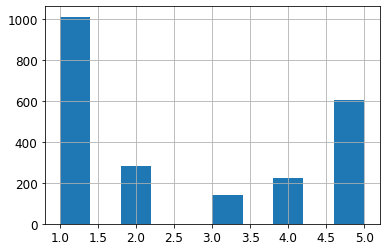

In [146]:
housing["rCPM_cat"].hist()

In [147]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["rCPM_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [148]:
strat_test_set["rCPM_cat"].value_counts() / len(strat_test_set)

1    0.447137
5    0.266520
2    0.125551
4    0.099119
3    0.061674
Name: rCPM_cat, dtype: float64

In [149]:
housing["rCPM_cat"].value_counts() / len(housing)

1    0.446846
5    0.266431
2    0.125717
4    0.099691
3    0.061315
Name: rCPM_cat, dtype: float64

In [150]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("rCPM_cat", axis=1, inplace=True)

# Visualizar (dispersiones) y explorar (correlaciones, histogramas, etc.)

In [151]:
housing = strat_train_set.copy()

Saving figure better_visualization_plot


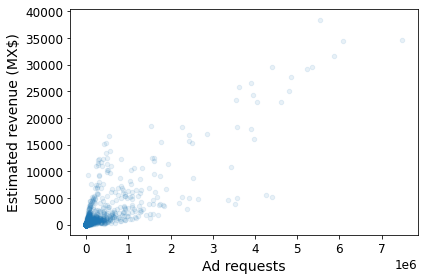

In [152]:
housing.plot(kind="scatter", x="Ad requests", y="Estimated revenue (MX$)", alpha=0.1)
save_fig("better_visualization_plot")

Saving figure scatter_matrix_plot


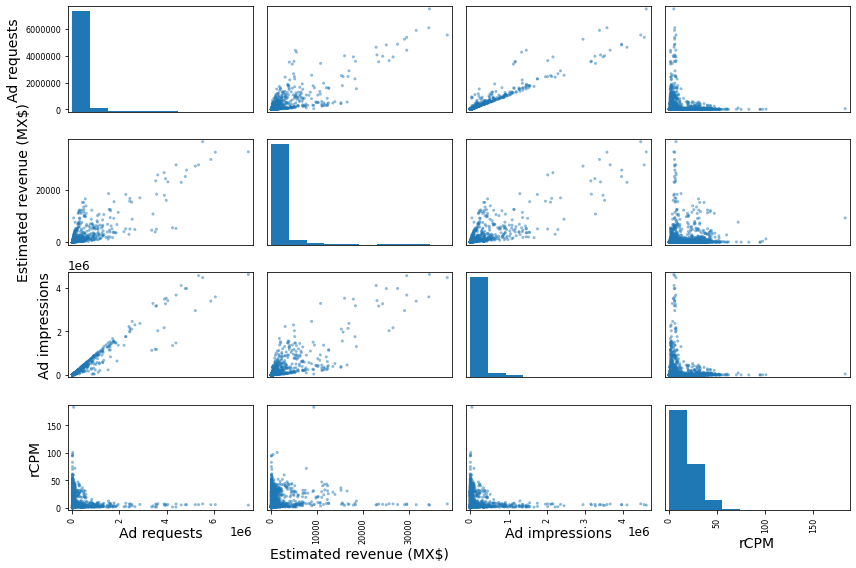

In [153]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

housing['rCPM'] = housing['Estimated revenue (MX$)']/housing['Ad requests']*1000

attributes = ["Ad requests", "Estimated revenue (MX$)", "Ad impressions",
              "rCPM"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure rCPM_vs_estimated_revenue


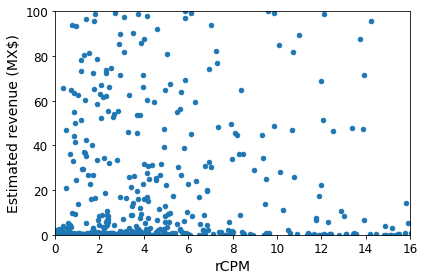

In [155]:
housing.plot(kind="scatter", x="rCPM", y="Estimated revenue (MX$)")
plt.axis([0, 16, 0, 100])
save_fig("rCPM_vs_estimated_revenue")

In [156]:
housing['Viewability'] = housing['Active view measured impressions']/housing['Active view enabled impressions']

In [158]:
corr_matrix = housing.corr()
corr_matrix["rCPM"].sort_values(ascending=False)

rCPM                                1.000000
Viewability                         0.065095
Estimated revenue (MX$)             0.003028
Active view viewable               -0.052327
Clicks                             -0.080181
Active view measurable             -0.089651
Active view measured impressions   -0.178699
Active view enabled impressions    -0.178809
Ad impressions                     -0.178880
Ad requests                        -0.184013
Matched requests                   -0.184013
Name: rCPM, dtype: float64

In [159]:
corr_matrix = housing.corr()
corr_matrix["Estimated revenue (MX$)"].sort_values(ascending=False)

Estimated revenue (MX$)             1.000000
Active view measured impressions    0.840633
Active view enabled impressions     0.840509
Ad impressions                      0.840422
Ad requests                         0.836780
Matched requests                    0.836780
Clicks                              0.821125
Active view viewable                0.470418
Active view measurable              0.423683
Viewability                         0.039880
rCPM                                0.003028
Name: Estimated revenue (MX$), dtype: float64

# Preparar (limpieza de datos, escalamiento)

In [160]:
housing = strat_train_set.drop("rCPM", axis=1) # drop labels for training set
housing_labels = strat_train_set["rCPM"].copy()

In [162]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

In [163]:

housing_num = housing.drop('Mes', axis=1)
housing_num = housing_num.drop('DFP Ad Units (Top Level)', axis=1)
housing_num = housing_num.drop('Transaction types', axis=1)
housing_num = housing_num.drop('Creative sizes', axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [164]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [165]:
imputer.statistics_

array([8.14300000e+03, 8.14300000e+03, 2.80000000e+01, 8.90343780e+01,
       5.61500000e+03, 1.20014489e+01, 7.24949711e+00, 5.49000000e+03,
       5.48900000e+03])

In [166]:
X = imputer.transform(housing_num)

In [168]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)
housing_tr.head()

,Ad requests,Matched requests,Clicks,Estimated revenue (MX$),Ad impressions,Active view measurable,Active view viewable,Active view enabled impressions,Active view measured impressions
1721,41.0,41.0,0.0,1.499672,27.0,4.000000,3.772727,27.0,27.0
168,1007.0,1007.0,7.0,30.888338,983.0,3.996725,10.407761,982.0,979.0
1198,46567.0,46567.0,33.0,2776.509885,40207.0,26.433563,24.991932,40755.0,40772.0
2204,4122.0,4122.0,1.0,8.709912,2073.0,21.750481,13.414433,2071.0,2062.0
1625,64116.0,64116.0,186.0,630.142644,60494.0,40.727949,21.656338,59233.0,58930.0


In [175]:
housing_cat = housing[['DFP Ad Units (Top Level)']]
housing_cat['Creative sizes'] = housing[['Creative sizes']]
housing_cat.head(10)

C:\Users\Aaron\AppData\Local\Temp\ipykernel_9828\3484544133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_cat['Creative sizes'] = housing[['Creative sizes']]


,DFP Ad Units (Top Level),Creative sizes
1721,35139216 » Me_lo_dijo_Lola,728x90
168,35139216 » ImagenTV,160x600
1198,35139216 » YouTube_Intrasitio,Video/Overlay
2204,35139216 » Me_lo_dijo_Lola,320x50
1625,35139216 » Cocina_Delirante,970x90
379,35139216 » Cocina_Delirante,300x250
1575,35139216 » Adrenalina360,300x100
175,35139216 » ImagenTV,970x250
855,35139216 » RSVP_2.0,468x60
1656,35139216 » Excelsior,300x600


In [176]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20

In [177]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[11.,  9.],
       [ 9.,  0.],
       [20., 13.],
       [11.,  5.],
       [ 5., 11.],
       [ 5.,  2.],
       [ 3.,  1.],
       [ 9., 10.],
       [15.,  8.],
       [ 7.,  3.]])

In [178]:
ordinal_encoder.categories_

[array(['19916383 » AMP_Excelsior_300x250', '35139216 » Actitud Fem 2.0',
        '35139216 » Actitudfem', '35139216 » Adrenalina360',
        '35139216 » Atraccion360', '35139216 » Cocina_Delirante',
        '35139216 » DineroenImagen', '35139216 » Excelsior',
        '35139216 » Imagen', '35139216 » ImagenTV', '35139216 » MGID_FIA',
        '35139216 » Me_lo_dijo_Lola', '35139216 » Me_lo_dijo_lola_20',
        '35139216 » Passbacks_Invent', '35139216 » RSVP',
        '35139216 » RSVP_2.0', '35139216 » Salud180',
        '35139216 » Salud_180_2.0', '35139216 » Video_Imagen_Digital',
        '35139216 » YouTube to Grupo Imagen Shared',
        '35139216 » YouTube_Intrasitio'], dtype=object),
 array(['160x600', '300x100', '300x250', '300x600', '320x100', '320x50',
        '330x250', '360x250', '468x60', '728x90', '970x250', '970x90',
        'Native', 'Video/Overlay'], dtype=object)]

In [179]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<1813x35 sparse matrix of type '<class 'numpy.float64'>'
	with 3626 stored elements in Compressed Sparse Row format>

In [180]:
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [181]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [182]:
cat_encoder.categories_

[array(['19916383 » AMP_Excelsior_300x250', '35139216 » Actitud Fem 2.0',
        '35139216 » Actitudfem', '35139216 » Adrenalina360',
        '35139216 » Atraccion360', '35139216 » Cocina_Delirante',
        '35139216 » DineroenImagen', '35139216 » Excelsior',
        '35139216 » Imagen', '35139216 » ImagenTV', '35139216 » MGID_FIA',
        '35139216 » Me_lo_dijo_Lola', '35139216 » Me_lo_dijo_lola_20',
        '35139216 » Passbacks_Invent', '35139216 » RSVP',
        '35139216 » RSVP_2.0', '35139216 » Salud180',
        '35139216 » Salud_180_2.0', '35139216 » Video_Imagen_Digital',
        '35139216 » YouTube to Grupo Imagen Shared',
        '35139216 » YouTube_Intrasitio'], dtype=object),
 array(['160x600', '300x100', '300x250', '300x600', '320x100', '320x50',
        '330x250', '360x250', '468x60', '728x90', '970x250', '970x90',
        'Native', 'Video/Overlay'], dtype=object)]

In [183]:
housing.columns

Index(['Mes', 'DFP Ad Units (Top Level)', 'Transaction types',
       'Creative sizes', 'Ad requests', 'Matched requests', 'Clicks',
       'Estimated revenue (MX$)', 'Ad impressions', 'Active view measurable',
       'Active view viewable', 'Active view enabled impressions',
       'Active view measured impressions'],
      dtype='object')

In [184]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [185]:
housing_num_tr

array([[-0.3192633 , -0.3192633 , -0.19905376, ..., -0.51141323,
        -0.32109599, -0.32101363],
       [-0.31768123, -0.31768123, -0.19696243, ..., -0.20646962,
        -0.31897239, -0.3188891 ],
       [-0.24306536, -0.24306536, -0.18919462, ...,  0.46381329,
        -0.23053033, -0.23008514],
       ...,
       [-0.31931407, -0.31931407, -0.19905376, ..., -0.55841738,
        -0.32113602, -0.3210538 ],
       [-0.07895301, -0.07895301, -0.0792502 , ...,  1.35176032,
        -0.16291518, -0.16393241],
       [-0.31563568, -0.31563568, -0.19188348, ..., -0.50803026,
        -0.31629509, -0.31623121]])

In [187]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

In [188]:
num_attribs = list(housing_num)
cat_attribs = ["DFP Ad Units (Top Level)", 'Creative sizes']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [189]:
housing_prepared

<1813x44 sparse matrix of type '<class 'numpy.float64'>'
	with 19943 stored elements in Compressed Sparse Row format>

In [190]:
housing_prepared.shape

(1813, 44)

In [191]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
num_attribs = list(housing_num)
cat_attribs = [""]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])